In [8]:
1+2

3

In [1]:
%matplotlib inline
import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

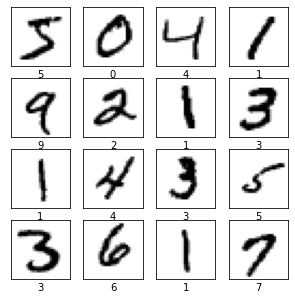

In [4]:
plt.figure(figsize=(5,5))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(x_train[i],cmap="binary")
  plt.xlabel(str(y_train[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

In [5]:
x_train=np.reshape(x_train,(60000,28*28))

In [6]:
x_test=np.reshape(x_test,(10000,28*28))

In [7]:
x_train=x_train/255.
x_test=x_test/255.

In [8]:
model=keras.models.Sequential([
                                  keras.layers.Dense(32,activation="sigmoid",input_shape=(784,)),
                                  keras.layers.Dense(32,activation="sigmoid"),
                                  keras.layers.Dense(10,activation="softmax")
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']

)

In [9]:
_=model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=20,batch_size=1024,
    verbose=2
)

Epoch 1/20
59/59 - 1s - loss: 2.1766 - accuracy: 0.3742 - val_loss: 1.9856 - val_accuracy: 0.6126
Epoch 2/20
59/59 - 0s - loss: 1.7902 - accuracy: 0.6463 - val_loss: 1.5727 - val_accuracy: 0.7005
Epoch 3/20
59/59 - 0s - loss: 1.3955 - accuracy: 0.7313 - val_loss: 1.2166 - val_accuracy: 0.7794
Epoch 4/20
59/59 - 0s - loss: 1.0871 - accuracy: 0.8014 - val_loss: 0.9553 - val_accuracy: 0.8383
Epoch 5/20
59/59 - 0s - loss: 0.8646 - accuracy: 0.8452 - val_loss: 0.7675 - val_accuracy: 0.8648
Epoch 6/20
59/59 - 0s - loss: 0.7041 - accuracy: 0.8697 - val_loss: 0.6321 - val_accuracy: 0.8804
Epoch 7/20
59/59 - 1s - loss: 0.5877 - accuracy: 0.8845 - val_loss: 0.5352 - val_accuracy: 0.8940
Epoch 8/20
59/59 - 0s - loss: 0.5035 - accuracy: 0.8948 - val_loss: 0.4641 - val_accuracy: 0.9016
Epoch 9/20
59/59 - 0s - loss: 0.4416 - accuracy: 0.9025 - val_loss: 0.4130 - val_accuracy: 0.9056
Epoch 10/20
59/59 - 1s - loss: 0.3961 - accuracy: 0.9082 - val_loss: 0.3742 - val_accuracy: 0.9112
Epoch 11/20
59/59 -

In [10]:
model.save('model.h5')

In [1]:
%%writefile ml_server.py
import json
import tensorflow as tf
import numpy as np
import random

from flask import Flask, request
app=Flask(__name__)

model=tf.keras.models.load_model('model.h5')
feature_model=tf.keras.models.Model(
    model.inputs,
    [layer.output for layer in model.layers]
)
_, (x_test,_)=tf.keras.datasets.mnist.load_data()
x_test=x_test/255.

def get_prediction():
    index=np.random.choice(x_test.shape[0])
    image=x_test[index,:,:]
    image_arr=np.reshape(image,(1,784))
    return feature_model.predict(image_arr),image

@app.route('/',methods=['GET','POST'])
def index():
    if request.method=='POST':
        preds,image=get_prediction()
        final_preds=[p.tolist() for p in preds]
        return json.dumps({
            'prediction':final_preds,
            'image':image.tolist()
        })
    return 'Welcome to the model server'
if __name__=='__main__':
    app.run()

Overwriting ml_server.py


In [7]:
%%writefile app.py
import streamlit as lit
import json
import requests
import matplotlib.pyplot as plt
import numpy as np

URI='http://127.0.0.1:5000/'
lit.title('Neural Network Visualiser')
lit.sidebar.markdown('## Input image')
if lit.button('Get random prediction'):
    response=requests.post(URI,data={})
    response=json.loads(response.text)
    preds=response.get('prediction')
    image=response.get('image')
    image=np.reshape(image,(28,28))
    lit.sidebar.image(image,width=150)
    
    for layer,p in enumerate(preds):
        
        numbers=np.squeeze(np.array(p))
        plt.figure(figsize=(32,4))
        if(layer==2):
            row=1
            column=10
        else:
            row=2
            col=16
        for i,number in enumerate(numbers):
            plt.subplot(row,col,i+1)
            plt.imshow(number*np.ones((8,8,3)).astype('float32'))
            plt.xticks([])
            plt.yticks([])
            
            if layer==2:
                plt.xlabel(str(i),fontsize=40)
        plt.subplots_adjust(wspace=0.05,hspace=0.05)
        plt.tight_layout()
        lit.text('Layer {}'.format(layer+1))
        lit.pyplot()


Overwriting app.py


In [2]:
pwd

'C:\\Users\\Vishal Verma\\Project'

In [8]:
%%writefile final.py
import streamlit as lit
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
model=tf.keras.models.load_model('model.h5')
feature_model=tf.keras.models.Model(
    model.inputs,
    [layer.output for layer in model.layers]
)
_, (x_test,_)=tf.keras.datasets.mnist.load_data()
x_test=x_test/255.

def get_prediction():
    index=np.random.choice(x_test.shape[0])
    image=x_test[index,:,:]
    image_arr=np.reshape(image,(1,784))
    return feature_model.predict(image_arr),image

lit.title('Neural Network Visualiser')
lit.sidebar.markdown('## Input image')
if lit.button('Get random prediction'):
    preds,image=get_prediction()
    image=np.reshape(image,(28,28))
    lit.sidebar.image(image,width=150)
    
    for layer,p in enumerate(preds):
        
        numbers=np.squeeze(np.array(p))
        plt.figure(figsize=(32,4))
        if(layer==2):
            row=1
            column=10
        else:
            row=2
            col=16
        for i,number in enumerate(numbers):
            plt.subplot(row,col,i+1)
            plt.imshow(number*np.ones((8,8,3)).astype('float32'))
            plt.xticks([])
            plt.yticks([])
            
            if layer==2:
                plt.xlabel(str(i),fontsize=40)
        plt.subplots_adjust(wspace=0.05,hspace=0.05)
        plt.tight_layout()
        lit.text('Layer {}'.format(layer+1))
        lit.pyplot()



Writing final.py
